 Градиентный бустинг. Ансамблевый метод. Решает задачи регрессии и классификации (логарифмическая регрессия).Градиентный бустинг устофчив к переобучению.

Метод регрессии.
 Идея градиентного бустинга в том, чтобы использовать ошибки остатков (residual errors). Модель **не** пытается предсказать на основе признаков значение целевой переменной. Модель **предсказывает ошибки** на основе признаков (residual) от предыдущей модели. 

 Пример: у нас есть цена дома $500, после первого дерева расчитывается ошибка в -$9. Мы можем предсказать цену с такой ошибкой в y1=$509. Признаки подаются на следующее дерево решений и расчитывается ошибка в f1 = -$8 и предсказанная цена $508. Далее, по формуле F1 = y1 + f1, проводится расчет 509 + (-8) = 501. Цена дома 500, а предсказание с ошибкой во втором дереве 501. Довольно близкое значение, учитывая, что предсказания были 509 и 508. 

Алгоритм: 
- создается начальная модель f0;
- Обучаем другую модель на ошибке e=y-f0;
- Создаетм новое прогнозное значение F1 = f0 + f1
- Повторяем при необходимости Fm = f(m-1) + kf(m)

Мы можем влиять на скорость работы этого процесса при помощи коэффициента learning_rate. Этот коэффициент будет **одинаковый** для всех шагов процесса. Чем меньше этот коэффициент, тем больше времени и больше деревьев потребуется для решения задачи. Гиперпараметры нужно подбирать кросс-валидацией и поиском по сетке. 

Метод классификации. Работает, принимая в качестве метрики ошибок логарифм. 

Далее мы будем использовать метод градиентного бустига при исследовании данных о грибах. Это задача классификации. Нам нужно построить модель, которая будет предсказывать нам съедобный гриб или нет, на основе набора данных о грибах.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\mmd28\OneDrive\Рабочий стол\Academic potfolio\Classical Machine Learning\Supervised learning\Classification\data\mushrooms.csv")

In [3]:
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


Целевая переменная - колонка class. проведем разбивку данных.

In [4]:
X = df.drop('class', axis=1)
y = df['class']

Создадим дамми-переменные

In [5]:
X = pd.get_dummies(X, drop_first=True)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [9]:
param_grid = {'n_estimators': [50, 100],
              'learning_rate': [0.1, 0.05, 0.2],
              'max_depth': [3, 4, 5]}

In [10]:
gb_model = GradientBoostingClassifier()

In [11]:
grid = GridSearchCV(gb_model, param_grid)

In [12]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [14]:
grid.best_estimator_

GradientBoostingClassifier(n_estimators=50)

In [15]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [16]:
predictions = grid.predict(X_test)

Оценим модель

In [17]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



Мы получили идельный результат.

Посмотрим на важность признаков. Мы хотим создать некоторое пошаговое руководство для собирателей грибов с предостережением. 

In [18]:
feat_import = grid.best_estimator_.feature_importances_

In [19]:
imp_feat = pd.DataFrame(index=X.columns, data=feat_import, columns=['Важность'])

In [20]:
imp_feat

,Важность
cap-shape_c,1.719903e-04
cap-shape_f,1.292893e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,3.855538e-17
...,...
habitat_l,0.000000e+00
habitat_m,0.000000e+00
habitat_p,0.000000e+00
habitat_u,0.000000e+00


Выведем важные значения, отбросим незначительные

In [21]:
imp_feat = imp_feat[imp_feat['Важность']>0.0005]

In [22]:
imp_feat

,Важность
cap-surface_g,0.001687
cap-color_y,0.002390
bruises_t,0.054790
odor_f,0.021627
odor_l,0.020737
odor_n,0.615630
odor_p,0.006250
gill-spacing_w,0.012193
gill-size_n,0.012123
stalk-shape_t,0.000516


Нанесем эти данные на график, отсортировав данные по колонке "Важность"

In [23]:
imp_feat = imp_feat.sort_values('Важность')

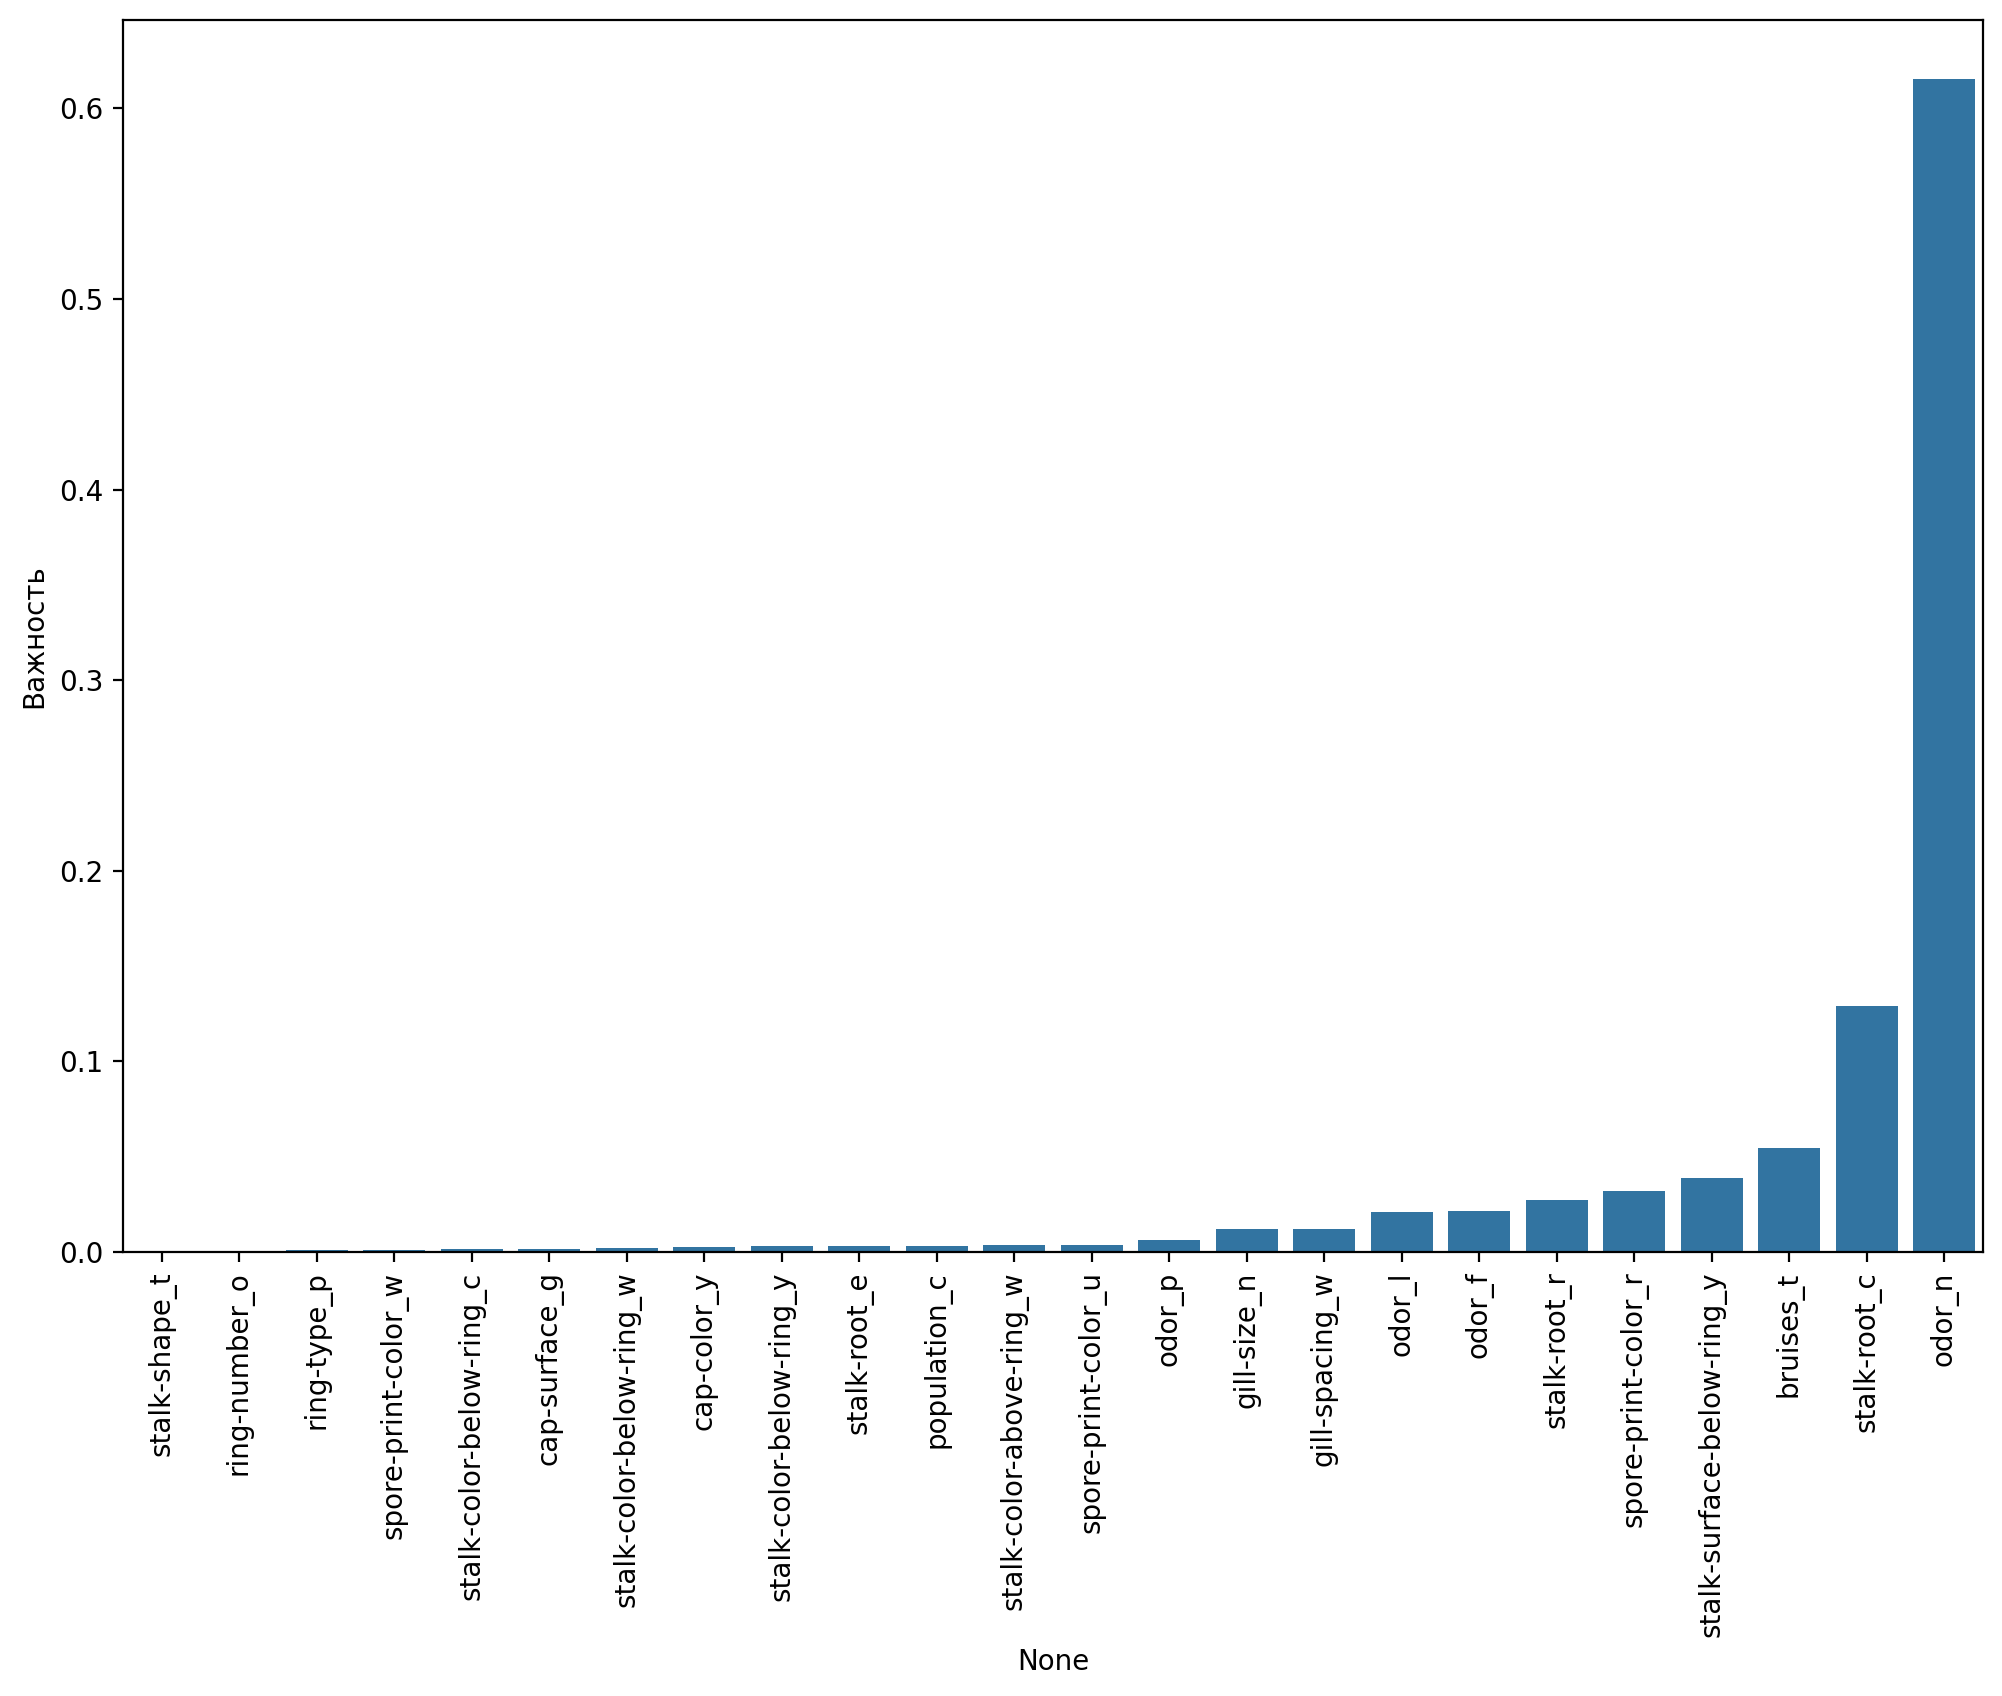

In [24]:
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(data=imp_feat, x=imp_feat.index, y='Важность')
plt.xticks(rotation=90);

Мы видим, что наиболее важный признак - это oder - запах. 